In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We are reading our data
df = pd.read_csv("C:/Users/NEIST/Desktop/Pre/main_datasets/correlation_dataset_100.csv")

In [3]:
# First 5 rows of our data
df

,ABC,ABCGG,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR3_A,nAromAtom,nAromBond,...,ATS2pe,ATS3pe,ATS4pe,ATS5pe,ATS6pe,ATS7pe,ATS8pe,ATS0p,ATS1p,target
0,12.227664,11.114914,20.147227,20.147227,3.699345,3.673300,1.771094,4.818309,6,6,...,374.6035,476.1766,468.3444,380.1786,338.2281,261.438200,173.804000,39.106397,50.034772,1
1,23.815569,19.774822,39.913068,39.913068,4.364259,4.641129,2.633570,6.823750,12,12,...,674.0802,801.0117,976.0827,1062.6022,1045.4281,1031.147200,849.846700,76.282916,98.447958,0
2,28.674108,23.571954,46.615926,46.615926,4.538757,4.829968,2.883173,7.456212,16,17,...,778.2712,1033.6904,1193.5495,1226.4257,1297.9612,1265.847600,1199.969600,99.091334,124.712358,1
3,27.898052,22.843849,45.596425,45.596425,4.511609,4.747241,2.838498,7.483839,16,17,...,788.4776,1045.2584,1206.8935,1235.5457,1305.8908,1276.340400,1204.865600,99.337356,125.600107,1
4,28.674108,23.571954,46.615926,46.615926,4.538757,4.829968,2.883173,7.456212,16,17,...,762.9439,980.7839,1167.5085,1212.4407,1263.5126,1239.231300,1156.416600,96.056413,119.586149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,6.359730,6.827704,9.020980,9.020980,3.049706,2.740544,0.902796,3.039410,0,0,...,150.0741,202.3492,132.6676,52.9760,9.6800,1132.339767,1113.781874,24.059421,23.911498,0
2354,14.130205,12.708546,24.177566,24.177566,3.856159,3.569641,1.914319,5.990343,9,10,...,421.3416,493.3588,561.3676,514.0288,441.0705,414.020900,291.288500,46.215931,57.473317,0
2355,14.268104,12.190940,23.133418,23.133418,3.844436,3.749222,1.909335,5.343208,13,15,...,388.5782,479.7767,525.7972,438.4305,450.0130,348.002500,289.281000,50.998406,65.219365,0
2356,12.118275,10.788639,20.038433,20.038433,3.694168,3.414212,1.697950,5.573446,9,10,...,308.5821,350.8938,351.8510,308.4577,251.1375,216.282200,147.178000,37.327250,45.523175,0


In [4]:
df.target.value_counts()

1    1298
0    1060
Name: target, dtype: int64

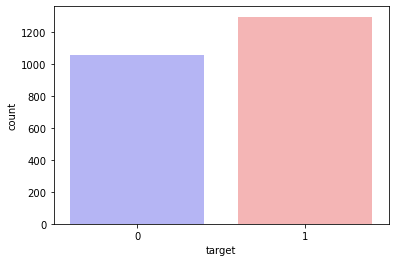

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == False])
countHaveDisease = len(df[df.target == True])
print("Percentage of values with False: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of values with True: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of values with False: 44.95%
Percentage of values with True: 55.05%


In [7]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [8]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [10]:
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.10,random_state=0)

In [11]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
#x_val = x_val.T
#y_val = y_val.T

In [12]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
predictions = knn.predict(x_test.T)
predictions_tr = knn.predict(x_train.T)
acc = knn.score(x_test.T,y_test.T)*100
acc_tr =knn.score(x_train.T,y_train.T)*100
print(acc)
print(acc_tr)
#predictions_val = knn.predict(x_val.T)
#acc_val =knn.score(x_val.T,y_val.T)*100
#print(acc_val)

76.69491525423729
88.54718981972428


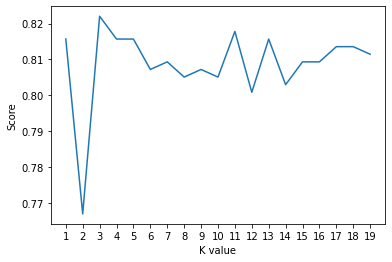

In [13]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn2, X=x_train.T, y=y_train.T, cv=10)
print(accuracies)
print(accuracies.mean())

[0.81481481 0.7989418  0.84656085 0.75661376 0.82539683 0.75661376
 0.80319149 0.7393617  0.77659574 0.76595745]
0.7884048181920521


In [15]:
cf =(confusion_matrix(y_test, predictions))
#cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_train, predictions_tr))
print(classification_report(y_train, predictions_tr))
#print(confusion_matrix(y_val, predictions_val))
#print(classification_report(y_val, predictions_val))

[[188  22]
 [ 88 174]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       210
           1       0.89      0.66      0.76       262

    accuracy                           0.77       472
   macro avg       0.78      0.78      0.77       472
weighted avg       0.80      0.77      0.77       472

[[846   4]
 [212 824]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       850
           1       1.00      0.80      0.88      1036

    accuracy                           0.89      1886
   macro avg       0.90      0.90      0.89      1886
weighted avg       0.91      0.89      0.89      1886



In [16]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.564117150567753

In [17]:
#from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef(y_val, predictions_val)

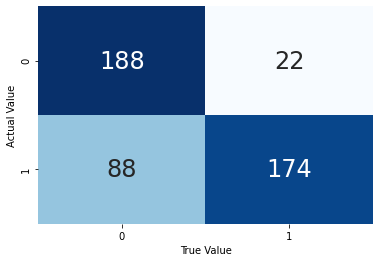

In [18]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
cf_plt

In [19]:
#cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
#cf_plt

In [20]:
#parameters
r_auc_score = roc_auc_score(y_test, predictions)
print('AUC = %0.3f)' % r_auc_score)
rsquare = r2_score(y_test, predictions)
print('R2 = %0.3f)' % rsquare)
#mae = mean_absolute_error(y_test, predictions)
#print('MAE = %0.3f)' % mae)
mse = mean_squared_error(y_test, predictions)
print('MSE = %0.3f)' % mse)
mbe = np.mean(predictions - y_test)
print('MBE = %0.3f)'% mbe)
rmse = mse** (1/2)
print('RMSE = %0.3f)' % rmse)
variance = np.var(predictions)
print('Variance = %0.3f)'% variance)
sse = np.mean((np.mean(predictions) - y)** 2)
bias = sse - variance
print('Bias = %0.3f)'% bias)

AUC = 0.780)
R2 = 0.056)
MSE = 0.233)
MBE = -0.140)
RMSE = 0.483)
Variance = 0.243)
Bias = 0.023)


In [21]:
#fall out
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
#TPR = TP/(TP+FN)
# Specificity or true negative rate
#TNR = TN/(TN+FP) 
# Precision or positive predictive value
#PPV = TP/(TP+FP)
# Negative predictive value
#NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
#ACC = (TP+TN)/(TP+FP+FN+TN)
print(FPR)
print(FNR)
print(FDR)

[0.33587786 0.1047619 ]
[0.1047619  0.33587786]
[0.31884058 0.1122449 ]


In [22]:
print("complete")

complete
